In [10]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import random
import config
import os

In [14]:
os.environ["HF_HOME"] = "/project2/jieyuz_1727/snehansh/hf_cache"
os.environ["HF_DATASETS_CACHE"] = "/project2/jieyuz_1727/snehansh/hf_datasets"
os.environ["TRANSFORMERS_CACHE"] = "/project2/jieyuz_1727/snehansh/hf_transformers"
os.environ["HUGGINGFACE_HUB_CACHE"] = "/project2/jieyuz_1727/snehansh/hf_hub"

In [13]:
print("Loading ImageNet from cache...")
dataset = load_dataset(
    "imagenet-1k",
    split="train",
    cache_dir="/project2/jieyuz_1727/snehansh/imagenet/cache"
)
print(f"Dataset loaded!")
print(f"Total images: {len(dataset):,}")

Loading ImageNet from cache...


Using the latest cached version of the dataset since imagenet-1k couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /project2/jieyuz_1727/snehansh/imagenet/cache/imagenet-1k/default/0.0.0/49e2ee26f3810fb5a7536bbf732a7b07389a47b5 (last modified on Fri Oct 24 19:10:54 2025).


Dataset loaded!
Total images: 1,281,167


Image 1: Label = 13
Image 2: Label = 316
Image 3: Label = 520
Image 4: Label = 192
Image 5: Label = 619
Image 6: Label = 724
Image 7: Label = 830
Image 8: Label = 951
Image 9: Label = 887
Image 10: Label = 601


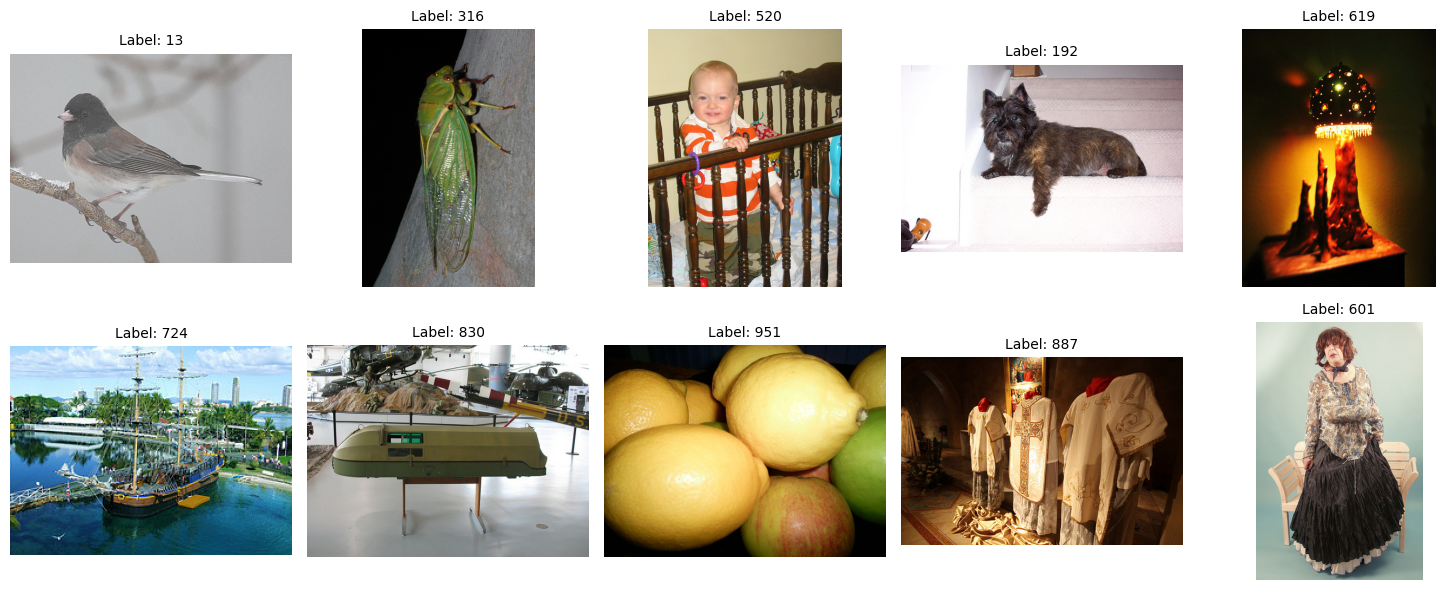

In [15]:
num_samples = 10

indices = random.sample(range(len(dataset)), num_samples)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, idx in enumerate(indices):
    sample = dataset[idx]
    image = sample['image']
    label = sample['label']
    
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}", fontsize=10)
    axes[i].axis('off')
    
    print(f"Image {i+1}: Label = {label}")

plt.tight_layout()
plt.show()

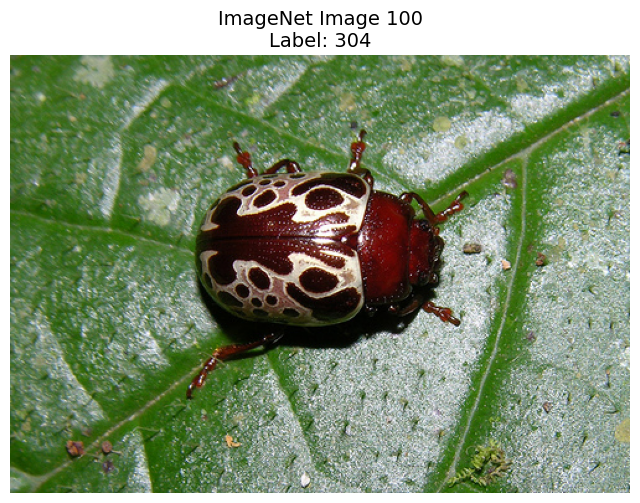


Image details:
  - Index: 100
  - Label: 304
  - Size: (500, 353)
  - Mode: RGB


In [16]:
index = 100

sample = dataset[index]
image = sample['image']
label = sample['label']

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f"ImageNet Image {index}\nLabel: {label}", fontsize=14)
plt.axis('off')
plt.show()

print(f"\nImage details:")
print(f"  - Index: {index}")
print(f"  - Label: {label}")
print(f"  - Size: {image.size}")
print(f"  - Mode: {image.mode}")

Image 1: Label ID = 580, Label Name = greenhouse, nursery, glasshouse
Image 2: Label ID = 909, Label Name = wok
Image 3: Label ID = 740, Label Name = power drill
Image 4: Label ID = 810, Label Name = space bar
Image 5: Label ID = 514, Label Name = cowboy boot
Image 6: Label ID = 309, Label Name = bee
Image 7: Label ID = 708, Label Name = pedestal, plinth, footstall
Image 8: Label ID = 876, Label Name = tub, vat
Image 9: Label ID = 162, Label Name = beagle
Image 10: Label ID = 662, Label Name = modem


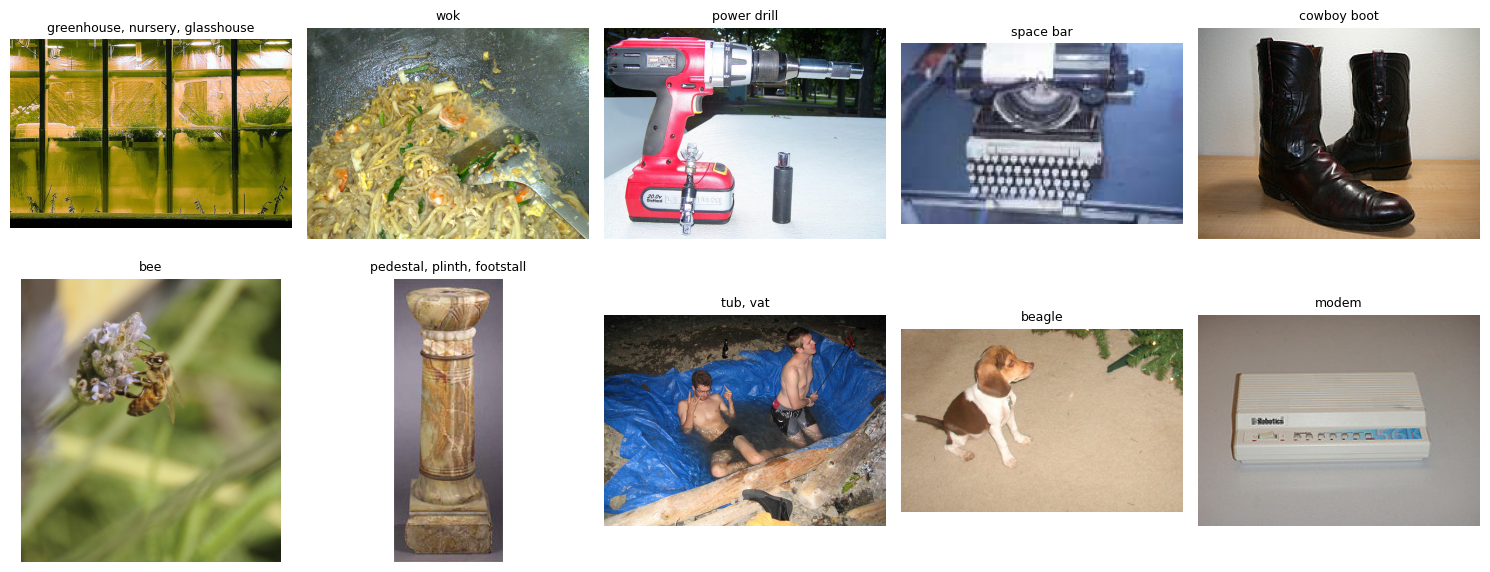

In [18]:
import random
import matplotlib.pyplot as plt

num_samples = 10
indices = random.sample(range(len(dataset)), num_samples)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i, idx in enumerate(indices):
    sample = dataset[idx]
    image = sample['image']
    label_id = sample['label']
    
    label_str = dataset.features["label"].names[label_id]
    
    axes[i].imshow(image)
    axes[i].set_title(f"{label_str}", fontsize=9)
    axes[i].axis('off')
    
    print(f"Image {i+1}: Label ID = {label_id}, Label Name = {label_str}")

plt.tight_layout()
plt.show()


In [26]:
all_labels = dataset['label']  # vectorized access

# Count images per label
label_counts = Counter(all_labels)

print(f"Total classes: {len(label_counts)}")
print(f"Min images per class: {min(label_counts.values())}")
print(f"Max images per class: {max(label_counts.values())}")
print(f"Avg images per class: {sum(label_counts.values()) / len(label_counts):.1f}")

Total classes: 1000
Min images per class: 732
Max images per class: 1300
Avg images per class: 1281.2


In [22]:
import json
label_names = dataset.features["label"].names
label_map = {i: name for i, name in enumerate(label_names)}

print("Sample mappings:")
for k in list(label_map.keys())[:5]:
    print(f"{k}: {label_map[k]}")

save_path = "imagenet_label_map.json"
with open(save_path, "w") as f:
    json.dump(label_map, f, indent=4)

print(f"\nLabel mapping saved to: {save_path}")

Sample mappings:
0: tench, Tinca tinca
1: goldfish, Carassius auratus
2: great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
3: tiger shark, Galeocerdo cuvieri
4: hammerhead, hammerhead shark

Label mapping saved to: imagenet_label_map.json
